# THE SPARKS FOUNDATION #GRIPFEB2021

### NAME - Pinky Abhayraj Yadav

### TASK - Exploratory Data Analysis on Global Terrorism dataset

# Importing the libraries 

In [3]:
import numpy as np 
import pandas as pd 

##importing the libraries needed for visualization 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
from matplotlib import animation, rc 



In [8]:
!pip install plotly

In [ ]:
plt.style.use('fivethirtyeight')
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import folium
import folium.plugins
from mpl_toolkits.basemap import Basemap
import geopandas as gpd

In [11]:
!pip install -q scipy
import io
import base64
import codecs
import warnings
warnings.filterwarnings('ignore')
from IPython.display import HTML, display

In [16]:
# Reading the data 
df = pd.read_csv("globalterror.csv", encoding='ISO-8859-1')

In [18]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [20]:
df.shape

(181691, 135)

In [21]:
df.describe()

,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,...,1.350000e+03,5.630000e+02,7.740000e+02,552.000000,10991.000000,10400.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,...,3.172530e+06,5.784865e+05,7.179437e+05,240.378623,4.629242,-29.018269,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,...,3.021157e+07,7.077924e+06,1.014392e+07,2940.967293,2.035360,65.720119,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,...,0.000000e+00,0.000000e+00,-9.900000e+01,0.000000,2.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,...,1.500000e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,...,4.000000e+05,0.000000e+00,1.273412e+03,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,...,1.000000e+09,1.320000e+08,2.750000e+08,48000.000000,7.000000,2769.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df.columns

Index(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region',
       ...
       'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG',
       'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'],
      dtype='object', length=135)

In [25]:
df['casualties']=df['nkill']+df['nwound']

## Statistics about the data 

In [26]:
df['country_txt'].value_counts()

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
New Hebrides               1
Falkland Islands           1
St. Lucia                  1
Antigua and Barbuda        1
Andorra                    1
Name: country_txt, Length: 205, dtype: int64

In [27]:
df['region_txt'].value_counts()

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: region_txt, dtype: int64

In [28]:
df['gname'].value_counts()

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
                                                    ...  
National Development Party (NDP)                        1
Majlis-e-Askari                                         1
Armed Subversives                                       1
White Liberation Army                                   1
Haika                                                   1
Name: gname, Length: 3537, dtype: int64

In [29]:
df['city'].value_counts()

Unknown                   9775
Baghdad                   7589
Karachi                   2652
Lima                      2359
Mosul                     2265
                          ... 
Mashemeri                    1
La Carmelita                 1
Paramo de Las Hermosas       1
Sirac                        1
Bunao                        1
Name: city, Length: 36674, dtype: int64

In [30]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [31]:
df['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [32]:
df['targsubtype1_txt'].value_counts()

Unnamed Civilian/Unspecified                               11596
Police Security Forces/Officers                            11178
Military Unit/Patrol/Convoy                                 8277
Military Personnel (soldiers, troops, officers, forces)     7963
Government Personnel (excluding police, military)           6610
                                                           ...  
Multiple Telecommunication Targets                            31
Fire Fighter/Truck                                            27
Personnel                                                     19
Oil Tanker                                                    19
Internet Infrastructure                                       12
Name: targsubtype1_txt, Length: 112, dtype: int64

In [34]:
print('Country with Highest Terrorist Attacks:',df['country_txt'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',df['region_txt'].value_counts().index[0])
print('Maximum people killed in an attack are:',df['nkill'].max(),'that took place in',df.loc[df['nkill'].idxmax()].country_txt)

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq


In [35]:
df['iyear'].value_counts()

2014    16903
2015    14965
2016    13587
2013    12036
2017    10900
2012     8522
2011     5076
1992     5071
2010     4826
2008     4805
2009     4721
1991     4683
1989     4324
1990     3887
1988     3721
1984     3495
1994     3456
2007     3242
1997     3197
1987     3183
1995     3081
1996     3058
1985     2915
1983     2870
1986     2860
2006     2758
1979     2662
1980     2662
1981     2586
1982     2544
2005     2017
2001     1906
2000     1814
1978     1526
1999     1395
2002     1333
1977     1319
2003     1278
2004     1166
1998      934
1976      923
1975      740
1970      651
1974      581
1972      568
1973      473
1971      471
Name: iyear, dtype: int64

In [36]:
df['natlty1_txt'].value_counts()

Iraq                                  24113
Pakistan                              13900
India                                 12098
Afghanistan                           10931
Colombia                               7922
                                      ...  
Western Sahara                            1
Marshall Islands                          1
Tuvalu                                    1
Greenland                                 1
Commonwealth of Independent States        1
Name: natlty1_txt, Length: 215, dtype: int64

In [37]:
print("Nationality of the maximally targetted group is:", df['natlty1_txt'].value_counts().index[0])

Nationality of the maximally targetted group is: Iraq


## Plotting graphs,barcharts to understand it better 

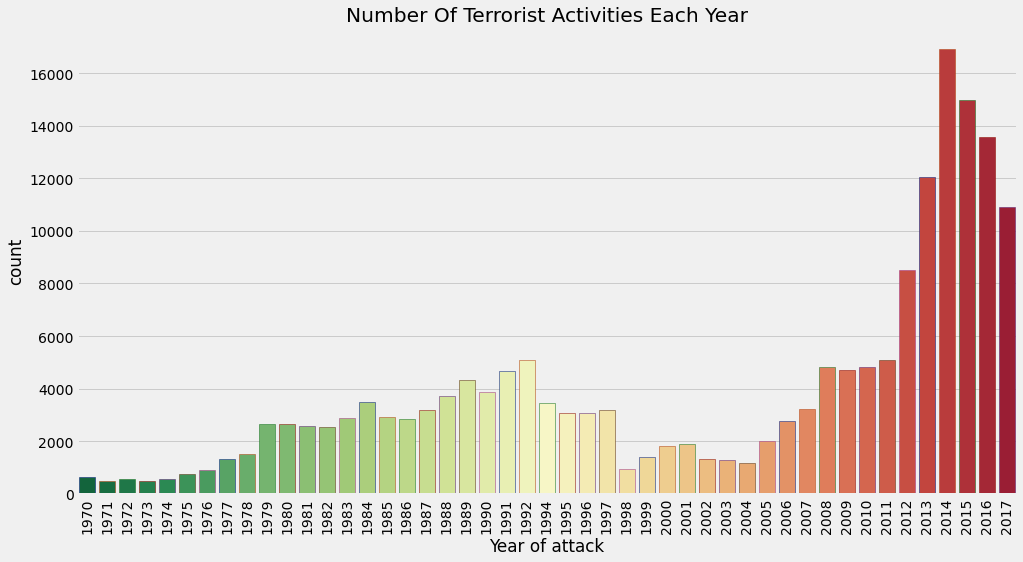

In [38]:
plt.subplots(figsize=(15,8))
sns.countplot('iyear',data=df,palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.xticks(rotation=90)
plt.xlabel('Year of attack')
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

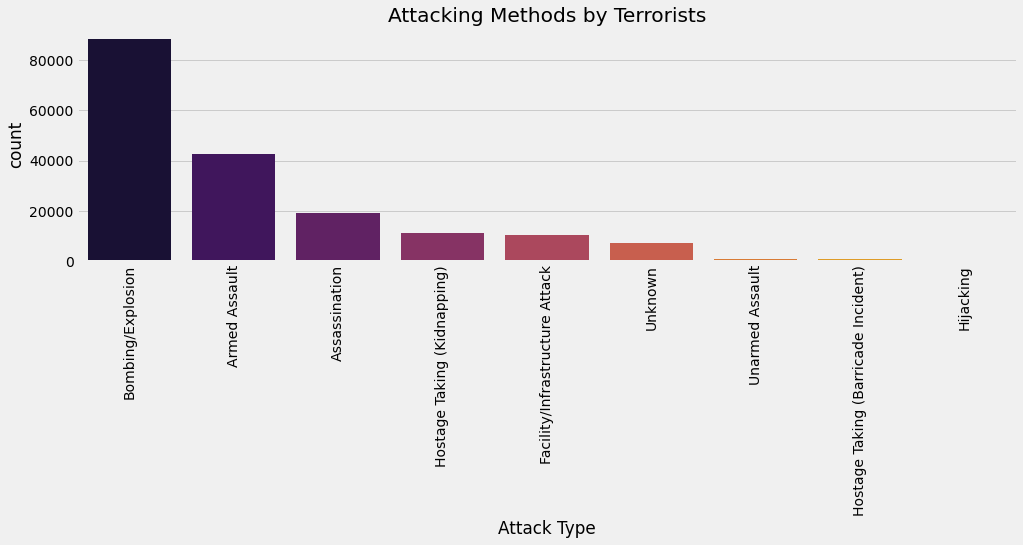

In [39]:
plt.subplots(figsize=(15,4))
sns.countplot('attacktype1_txt',data=df,palette='inferno',order=df['attacktype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Attack Type')
plt.title('Attacking Methods by Terrorists')
plt.show()

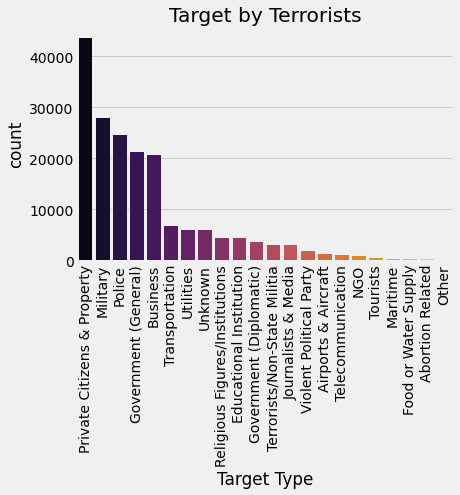

In [40]:
sns.countplot('targtype1_txt',data=df,palette='inferno',order=df['targtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Target Type')
plt.title('Target by Terrorists')
plt.show()


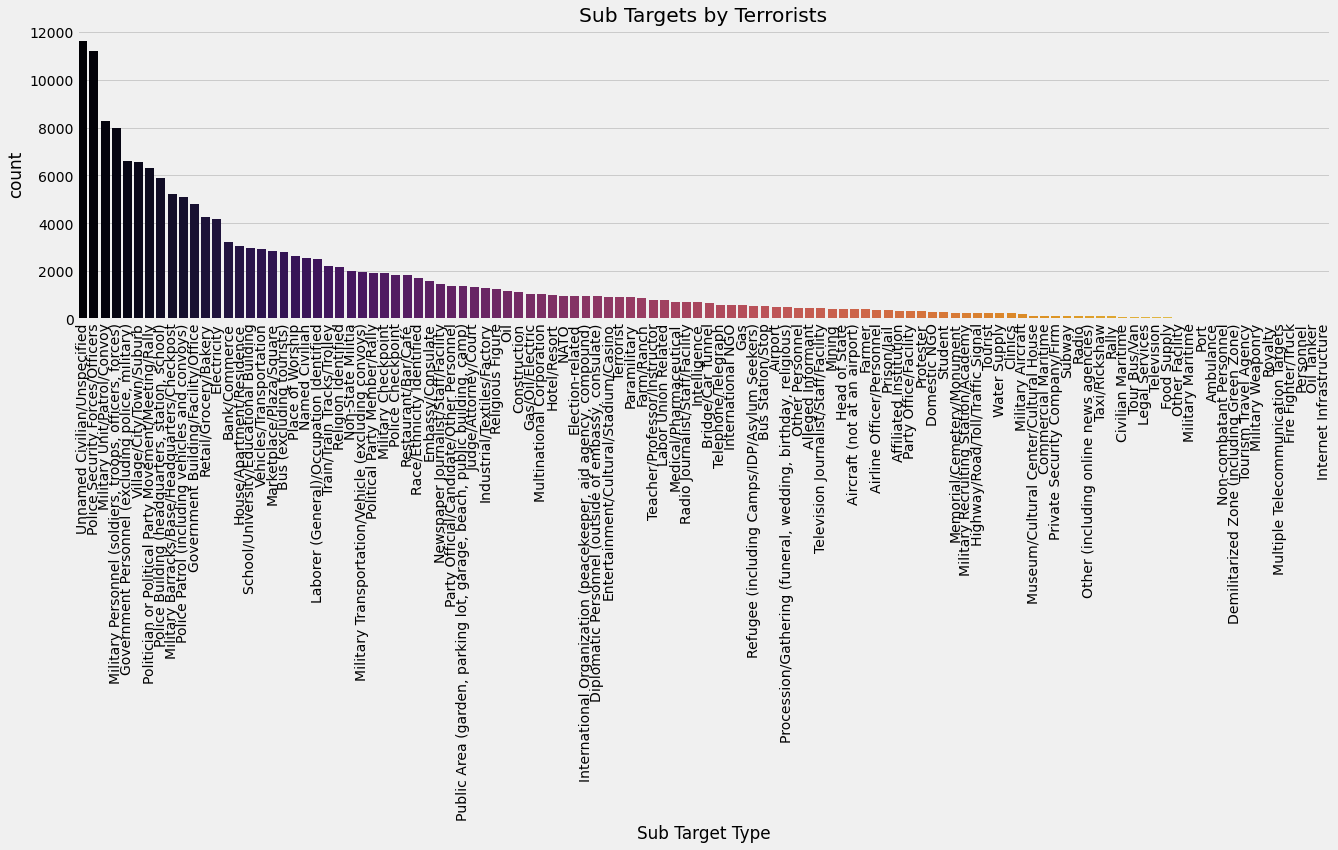

In [41]:
plt.subplots(figsize=(20,5))
sns.countplot('targsubtype1_txt',data=df,palette='inferno',order=df['targsubtype1_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Sub Target Type')
plt.title('Sub Targets by Terrorists')
plt.show()

In [42]:
print("The top sub targets of terrorists are:", df['targsubtype1_txt'].value_counts().index[:5])

The top sub targets of terrorists are: Index(['Unnamed Civilian/Unspecified', 'Police Security Forces/Officers',
       'Military Unit/Patrol/Convoy',
       'Military Personnel (soldiers, troops, officers, forces)',
       'Government Personnel (excluding police, military)'],
      dtype='object')


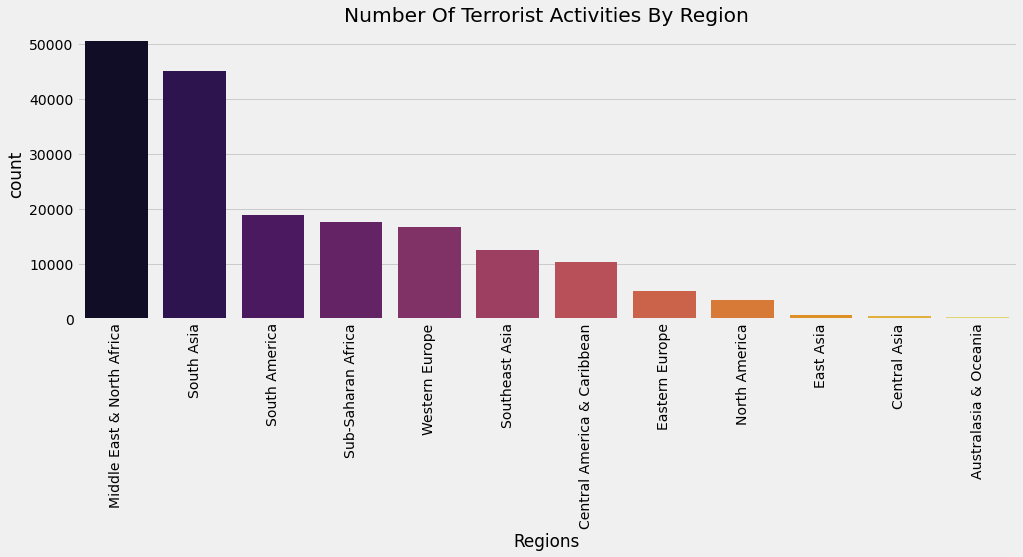

In [43]:
plt.subplots(figsize=(15,5))
sns.countplot('region_txt',data=df,palette='inferno',order=df['region_txt'].value_counts().index)
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.title('Number Of Terrorist Activities By Region')
plt.show()

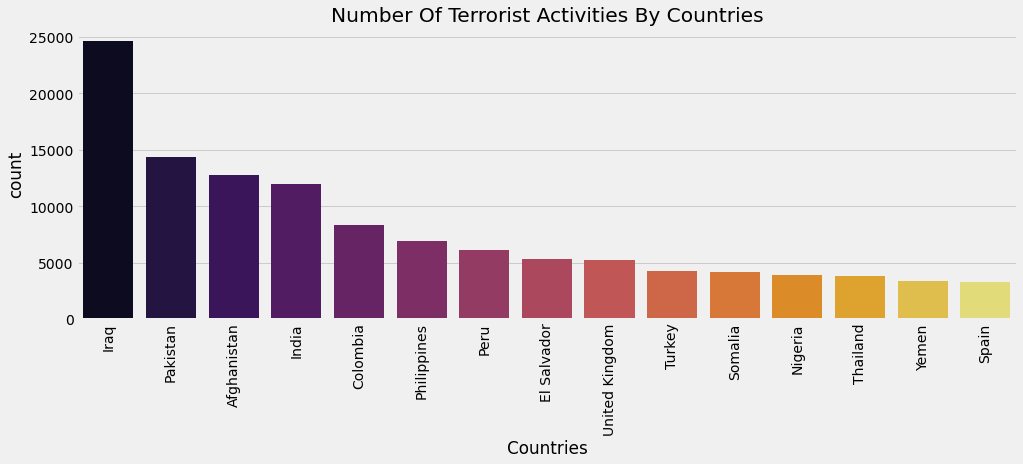

In [44]:
plt.subplots(figsize=(15,5))
sns.countplot('country_txt',data=df,palette='inferno',order=df['country_txt'].value_counts()[:15].index)
plt.xticks(rotation=90)
plt.xlabel('Countries')
plt.title('Number Of Terrorist Activities By Countries')
plt.show()

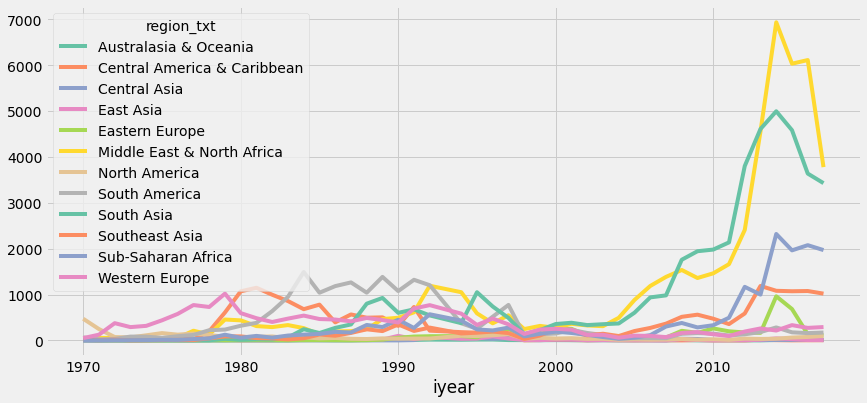

In [45]:
df_region=pd.crosstab(df.iyear,df.region_txt)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

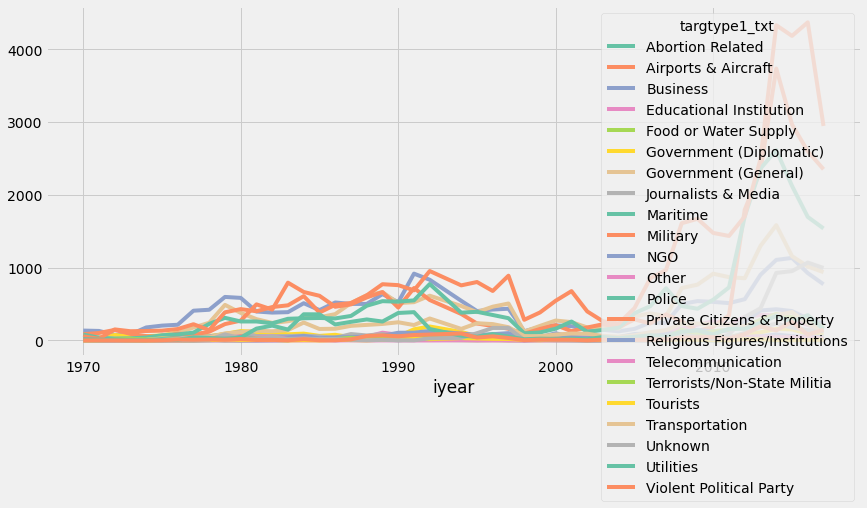

In [46]:
df_region=pd.crosstab(df.iyear,df.targtype1_txt)
df_region.plot(color=sns.color_palette('Set2',12))
fig=plt.gcf()
fig.set_size_inches(13,6)
plt.show()

In [47]:
df['casualties'].sum()

872892.0

In [48]:
df['nkill'].sum()

411868.0

In [49]:
df['nwound'].sum()

523869.0

In [51]:
df1=df.groupby('region_txt')['casualties'].sum()
df2=df1.to_frame()
df2.rename(columns = {"" : "Casualties"}, inplace = True)
df2.insert(1,'Year',df.iyear,True)
df2.reset_index()

,region_txt,casualties,Year
0,Australasia & Oceania,409.0,NaN
1,Central America & Caribbean,34530.0,NaN
2,Central Asia,2969.0,NaN
3,East Asia,10003.0,NaN
4,Eastern Europe,18239.0,NaN
5,Middle East & North Africa,329807.0,NaN
6,North America,26398.0,NaN
7,South America,43562.0,NaN
8,South Asia,234366.0,NaN
9,Southeast Asia,40841.0,NaN


In [52]:
df.groupby(['region_txt', 'iyear'])['casualties'].count()

region_txt             iyear
Australasia & Oceania  1970       1
                       1971       1
                       1972       8
                       1973       1
                       1974       1
                               ... 
Western Europe         2013     260
                       2014     215
                       2015     331
                       2016     272
                       2017     291
Name: casualties, Length: 529, dtype: int64

Text(0, 0.5, 'Casualties')

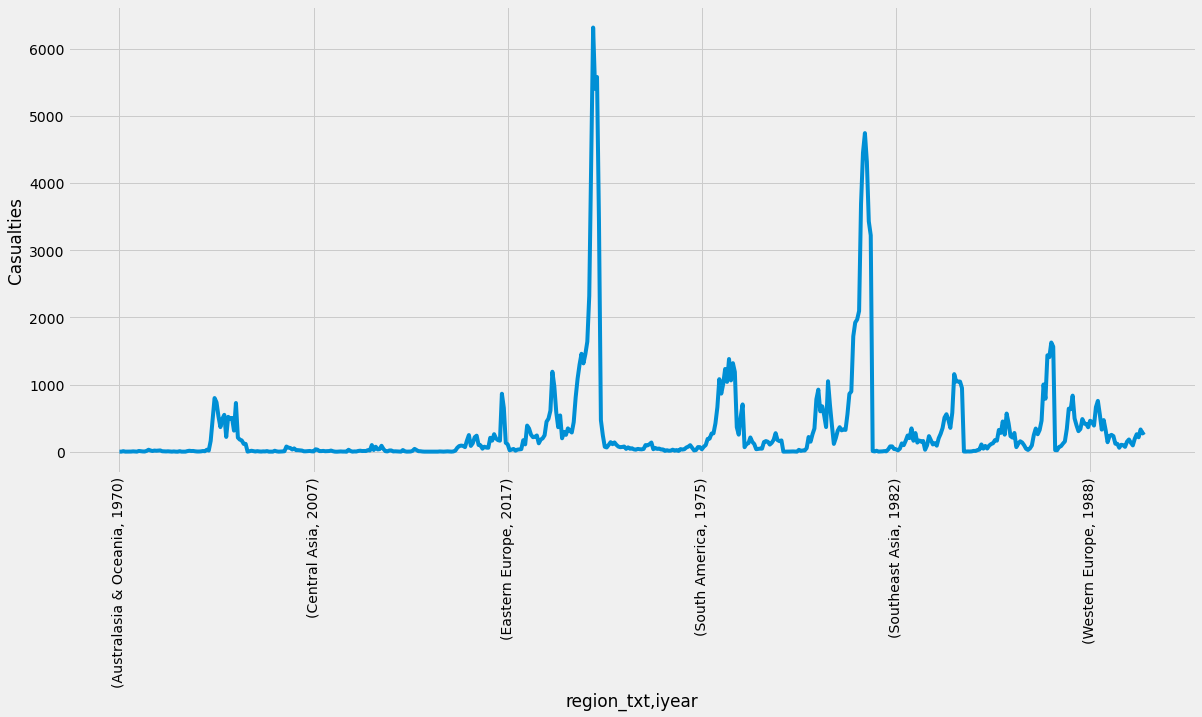

In [53]:
plt.subplots(figsize=(18,8))
df.groupby(['region_txt', 'iyear']).count()['casualties'].plot()
#sns.countplot('country_txt',data=df,palette='inferno',order=df['country_txt'].value_counts()[:15].index)
plt.xticks(rotation=90)
#plt.xlabel('Countries')
plt.ylabel("Casualties")
#plt.title('Number Of Terrorist Activities By Countries')
#plt.show()

Text(0, 0.5, 'Casualties')

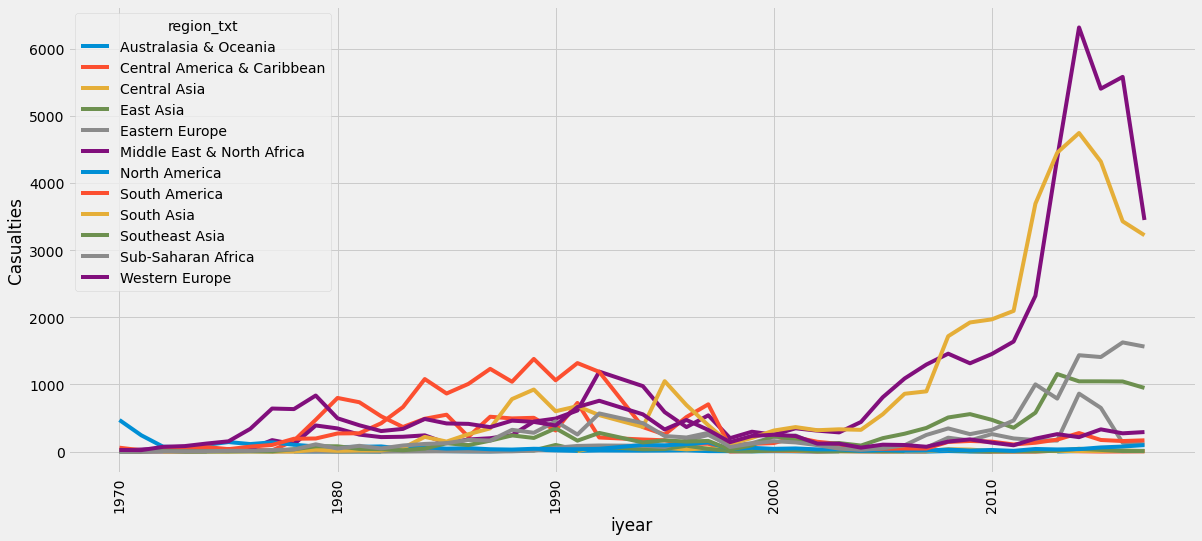

In [54]:
df.groupby(['region_txt', 'iyear']).count()['casualties'].unstack('region_txt').plot(figsize=(18,8))
plt.xticks(rotation=90)

plt.ylabel("Casualties")

In [55]:
d=df.groupby(['region_txt', 'iyear'])['casualties'].sum()
d

region_txt             iyear
Australasia & Oceania  1970        0.0
                       1971        0.0
                       1972        1.0
                       1973        0.0
                       1974        0.0
                                 ...  
Western Europe         2013       92.0
                       2014       36.0
                       2015      697.0
                       2016     1138.0
                       2017      592.0
Name: casualties, Length: 529, dtype: float64

Text(0, 0.5, 'Killed')

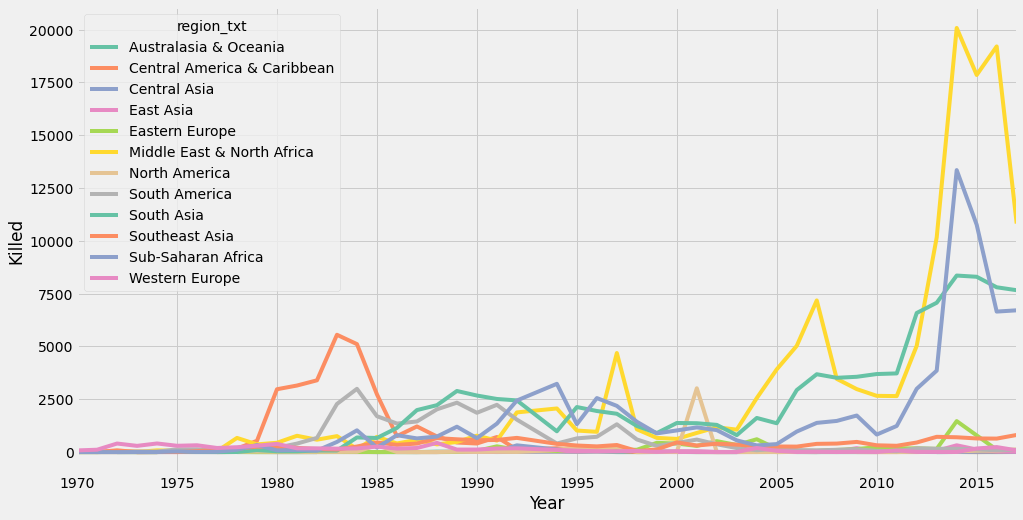

In [56]:
d=df.groupby(['iyear','region_txt'])['nkill'].sum()
plot_df = d.unstack('region_txt').loc[:]
plot_df.index = pd.PeriodIndex(plot_df.index.tolist(),freq='A')
plot_df.plot(figsize=(15,8),color=sns.color_palette('Set2',12))
plt.xlabel("Year")
plt.ylabel("Killed")
#ax.show()

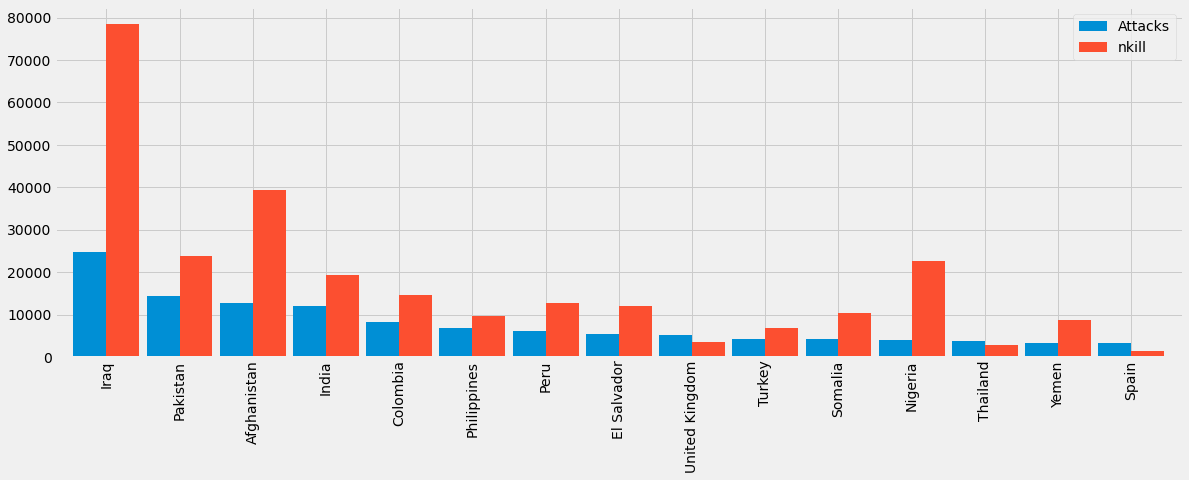

In [57]:
count=df['country_txt'].value_counts()[:15].to_frame()
count.columns=['Attacks']
data=df.groupby('country_txt')['nkill'].sum().to_frame()
count.merge(data,left_index=True,right_index=True,how='left').plot.bar(width=0.9)
fig=plt.gcf()
fig.set_size_inches(18,6)
plt.show()

## Conclusion of the project 

1. Iraq ranked first on the global terrorism for their terrorist activity followed by Pakistan ,Afganistan,India amd so on.

2. Most targeted areas are private citizans and properly,military,police .

3. Global terror attack death rose sharply starting year 2011